 The Indiana Training Program in Public and Population Health Informatics
## Exercise 2 - Data visualization (Using the **ggplot2** package)
*Competencies addressed*  
 
 1. Identify as well as access structured electronic data sets (I.1.1)
 2. Transformation of raw data to formats more suitable for downstream use cases (I.1.2)
 3. Develop an understanding of processing different kinds of data (e.g. string processing)  (I.1.5)
 4. Acquire skills related to visualize data to discover patterns (including interactive visualization techniques) (II.1.3)

 *Learning objectives*  
 At the end of this module the student will be able to do the following:

 1. Load a delimited dataset using <font color = "red">fread()</font> from R package **data.table** 
 2. Create visualizations using R package **ggplot2**
 3. Understand the concept of grammar of graphics when creating visualizations in **ggplot2**
 4. Use the **dplyr** package in conjunction with **ggplot2**
 5. Experiment with **stringr** and using newly created variables in **ggplot2**
 
This exercise uses the patient data from the Public Health Emergency Surveillance System (<font color = "blue">PHESS</font>) dataset. The data contains patient level admission information, patient demographics, geographical information such as ZIP code and local population, and several FLAG variables describing the patient's experience upon admission. This exercise will be focused on creating visualizations using the **ggplot2** package. However, some types of visualizations simply don't apply in this dataset, so we will not discuss all geom (geometric object) functions from R package **ggplot2**. 



# NOTE:

If you have further interest in this package, please consider the following **FREE** sources:

[R for Data Science](https://r4ds.had.co.nz) (written by the author of **ggplot2**, Hadley Wickham)

[Free Harvard GGPLOT2 Tutorial](https://tutorials.iq.harvard.edu/R/Rgraphics/Rgraphics.html)

In [2]:
library(ggplot2)
library(data.table)
library(dplyr)
library(stringr)

## read in the data using fread() for fast reading of data sets
PHESS <-fread("../../../PHESS/PHESS_SUBSET_FINAL_2018Oct11_07-48-09.csv")


Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



# Creating our first plot with **ggplot2**:

The **ggplot2** package (called ggplot - pronounced jijiplot) utilizes a conceptual framework called the grammar of graphics, originally published by Leland Wilkinson in 2005. This means that the basic foundation of a plot is created, and "layers" are added sequentially to create more content in the plot. 

Our first exercise is below - create a barchart showing percentage of FLAG_ABDOMINAL:

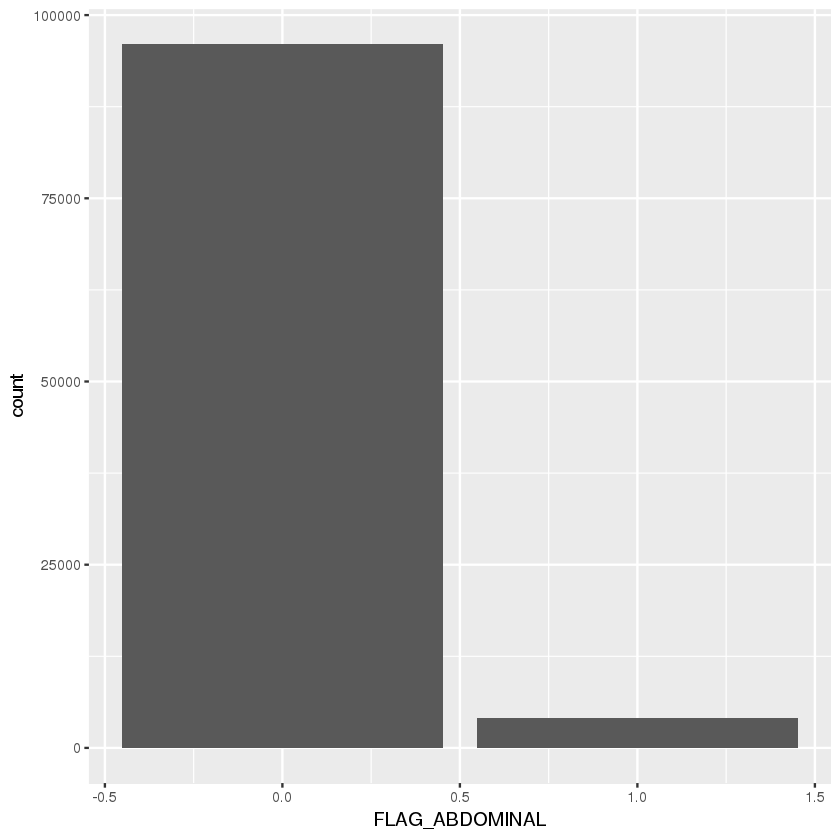

In [8]:
ggplot(aes(x = FLAG_ABDOMINAL), data = PHESS) + geom_bar()

The above plot is a good starting point, but what if we wanted percents instead of counts? Create a plot that presents the percentage in the **y** axis, as opposed to the count:

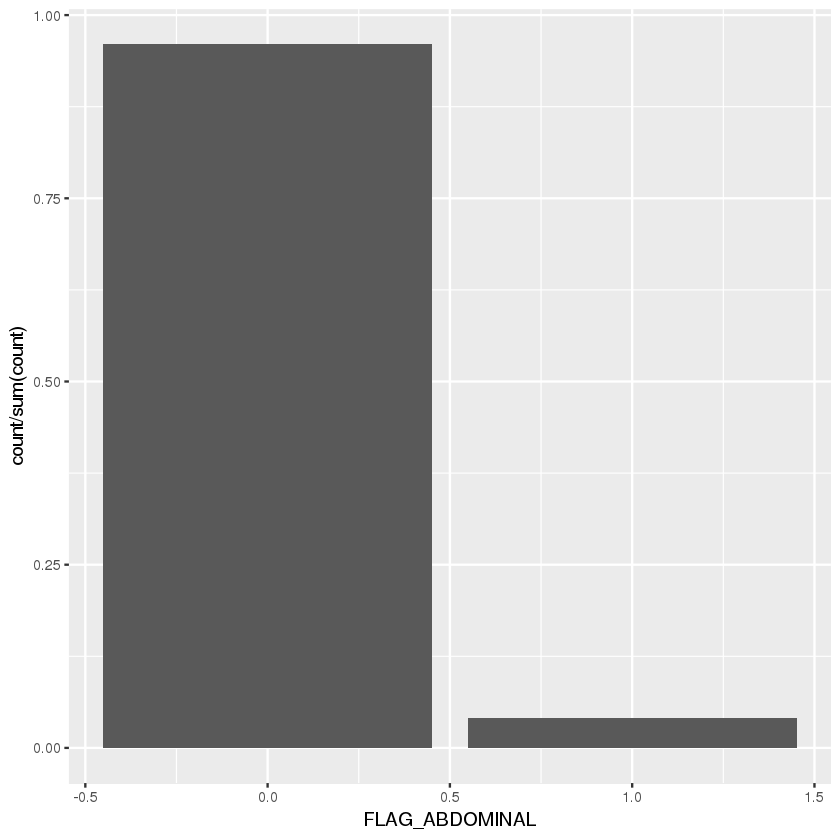

In [10]:
ggplot(aes(x = FLAG_ABDOMINAL, y = ..count../sum(..count..)), data = PHESS) + geom_bar()

We're improving, but what if we'd like to change the labels, x axis ticks, etc? It is not appropriate to include ticks for -0.5, 0.5, 1.5, etc. due to the fact that the FLAG is zero or one. We have multiple ways to proceed - please show one way (consider the <font color = "red">scale_x_continuous()</font>, <font color = "red">ylab()</font>, and <font color = "red">xlab()</font> functions:

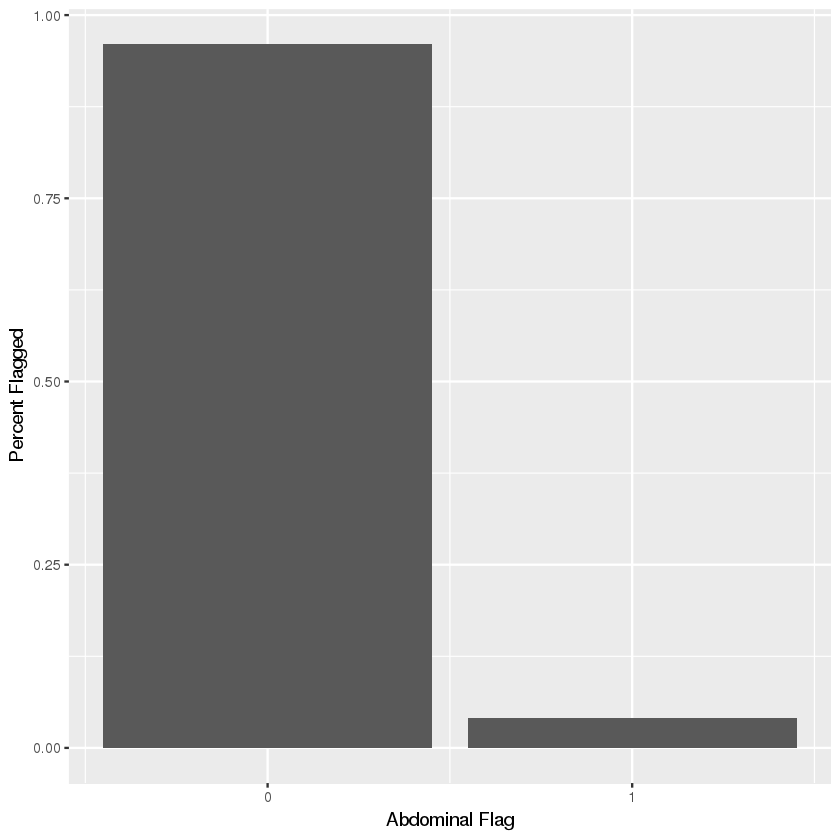

In [12]:
## rename the axes, remove ticks for all but 0, 1:
ggplot(aes(x = FLAG_ABDOMINAL, y = ..count.. / sum(..count..)), data = PHESS) + geom_bar() + 
ylab("Percent Flagged") + xlab("Abdominal Flag") +
scale_x_continuous(breaks = c(0,1))

Alternatively, we can use what we learned in **dplyr** to modify the <font color = "blue">PHESS</font> data before passing to **ggplot2**

**NOTE**: **ggplot2** uses + to add layers, **dplyr** uses %>% to chain methods:

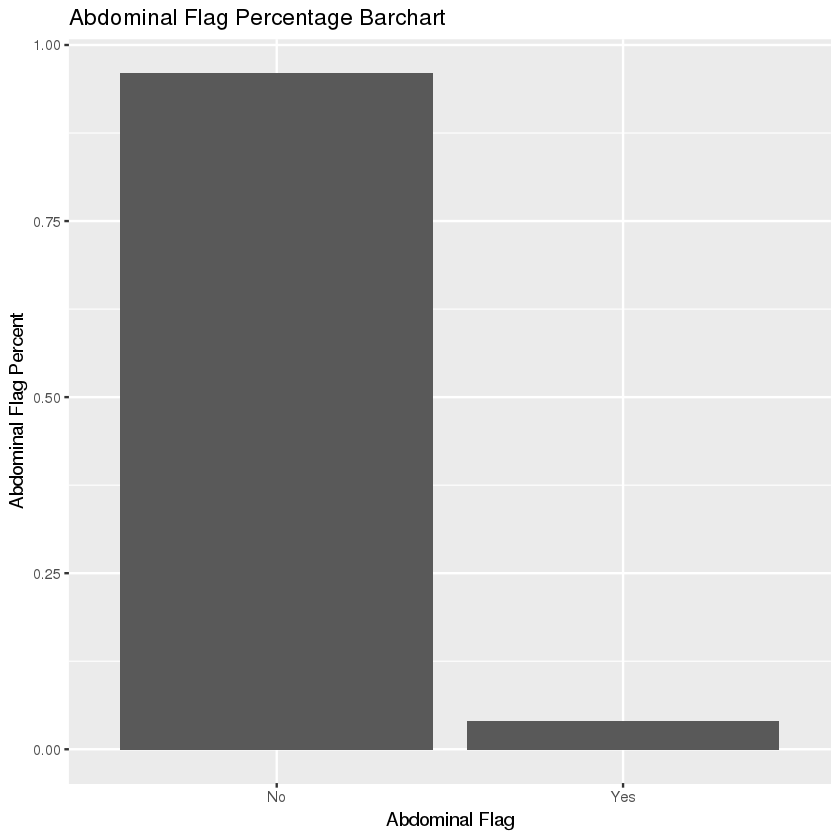

In [17]:
PHESS %>% mutate(flagAb = ifelse(FLAG_ABDOMINAL == 1, "Yes", "No")) %>% 
ggplot(aes(x = flagAb, y = ..count.. / sum(..count..))) + geom_bar() +
ylab("Abdominal Flag Percent") + xlab("Abdominal Flag") +
## title for plot
ggtitle("Abdominal Flag Percentage Barchart")

# Discussing the Results so far:

Notice that there are several components in the call to **ggplot2**. For instance, we specify the data, which is where **ggplot2** should look for the variables we want to visualize. We also specify mappings, actually termed **aesthetic** mappings, which map variables in our dataset to visual propreties, such as the **x** axis, **y** axis, or **color**, **fill**, **size**, etc. You will see that there are MANY aesthetic mappings that can be employed in ggplot.

The mappings we've used so far are:

**x**: ABDOMINAL_FLAG or abFlag

**y**: count or ..count.. / sum(..count..) - this is special **ggplot2** specific syntax that shows up when making barcharts and histograms

Make a plot of headache flag, similar to as done already for the abdominal flag:


In [1]:
ggplot(aes(x = FLAG_HEADACHE), data = PHESS) + geom_bar() + xlab("Headache Flag") +
ylab("Count") + scale_x_continuous(breaks = c(0,1))

ERROR: Error in ggplot(aes(x = FLAG_HEADACHE), data = PHESS): could not find function "ggplot"


Make a barchart (using **ggplot2**) that separates the headache flag data by GENDER:

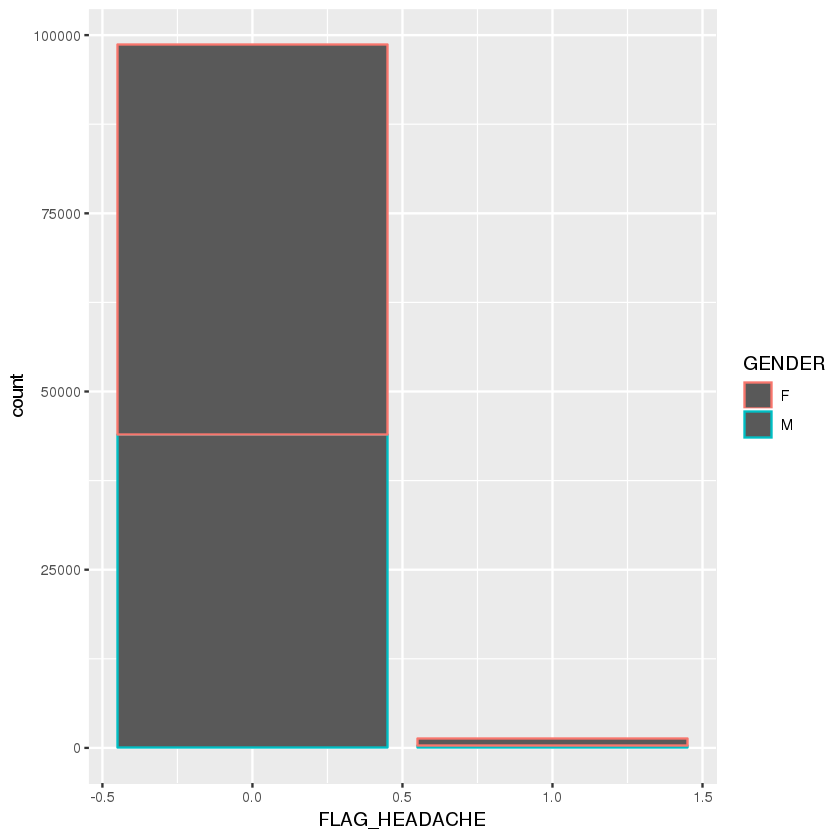

In [23]:
ggplot(aes(x = FLAG_HEADACHE, color = GENDER), data = PHESS) + geom_bar()

Create a barchart where the bars are not "stacked" within GENDER. How can you change the positional adjustment to <font color = "red">geom_bar()</font>?

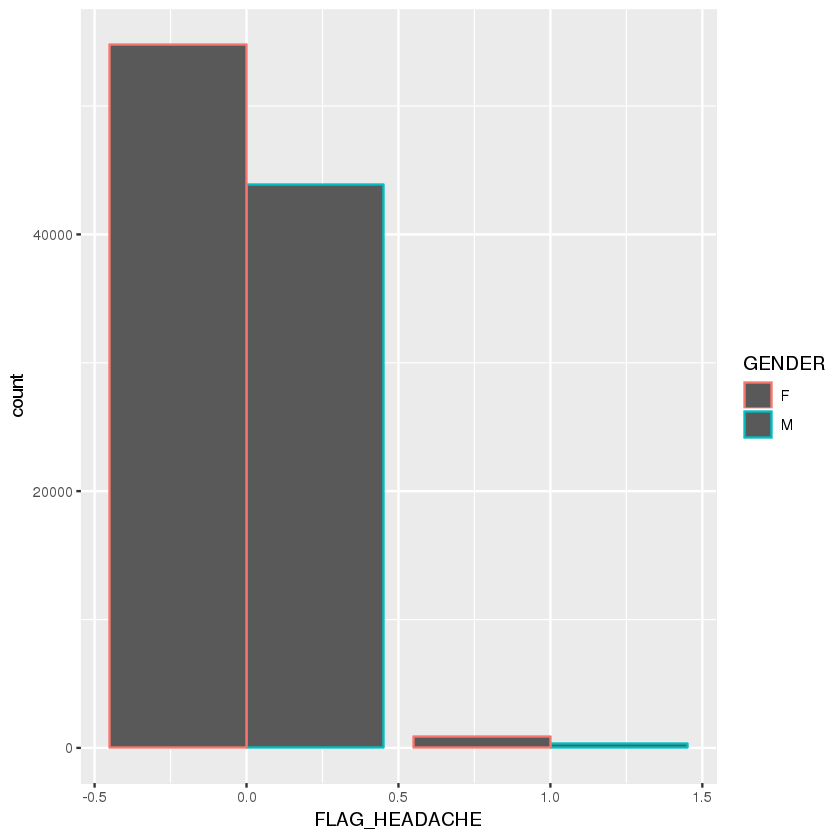

In [18]:
ggplot(aes(x = FLAG_HEADACHE, color = GENDER), data = PHESS) + geom_bar(position = "dodge")

Experiment with the fill argument to aes() - how can you modify the colors in the bars?

In [2]:
ggplot(aes(x = FLAG_HEADACHE, fill = GENDER), data = PHESS) + geom_bar(position = "dodge")

ERROR: Error in ggplot(aes(x = FLAG_HEADACHE, fill = GENDER), data = PHESS): could not find function "ggplot"


What if one wanted gender specific proportions for FLAG_HEADACHE? The easiest way is to combine our **dplyr** and **ggplot2** knowlege. Aggregate the <font color = "blue">PHESS</font> data to create a data frame which shows percent of each flag by the GENDER variable and print the result:

In [20]:
PHESSAgg <- PHESS %>% group_by(GENDER, FLAG_HEADACHE) %>% summarize(n = n()) %>% group_by(GENDER) %>%
mutate(pct = n / sum(n))
PHESSAgg

GENDER,FLAG_HEADACHE,n,pct
F,0,54806,0.983490651
F,1,920,0.016509349
M,0,43906,0.991688124
M,1,368,0.008311876


Now use the aggregated data to plot the distribution of FLAG_HEADACHE within each gender:

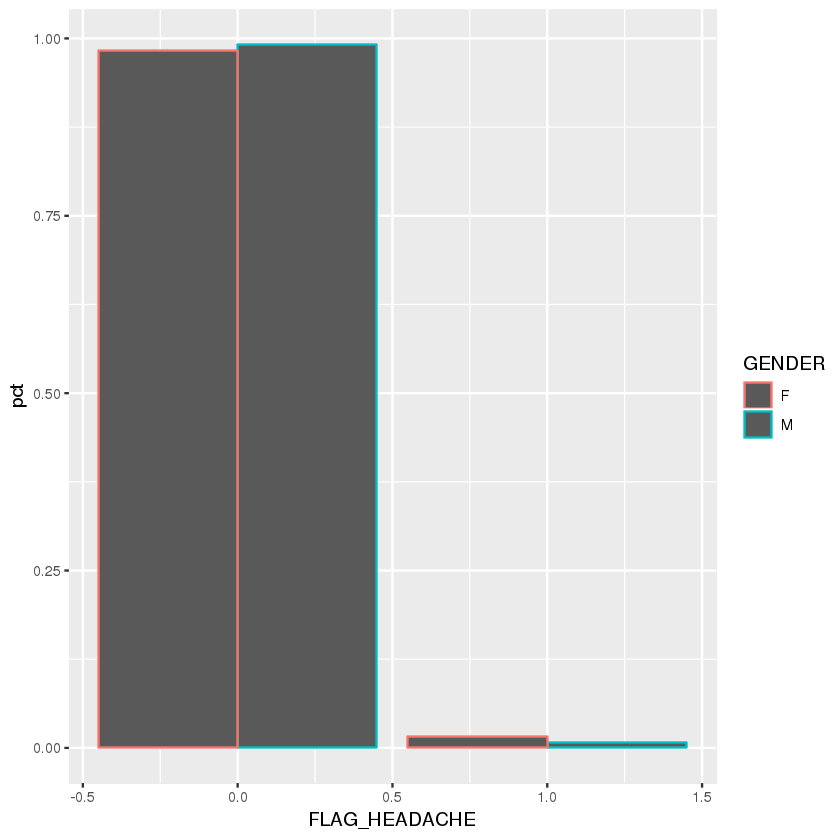

In [21]:
PHESSAgg %>% ggplot(aes(x = FLAG_HEADACHE, y = pct, color = GENDER)) + 
geom_bar(stat = "identity", position = "dodge")

Instead of plotting FLAG_HEADACHE as the **x** variable, let GENDER be the **x** variable (what about the TYPE of FLAG_HEADACHE? Do you need to make modifications?):

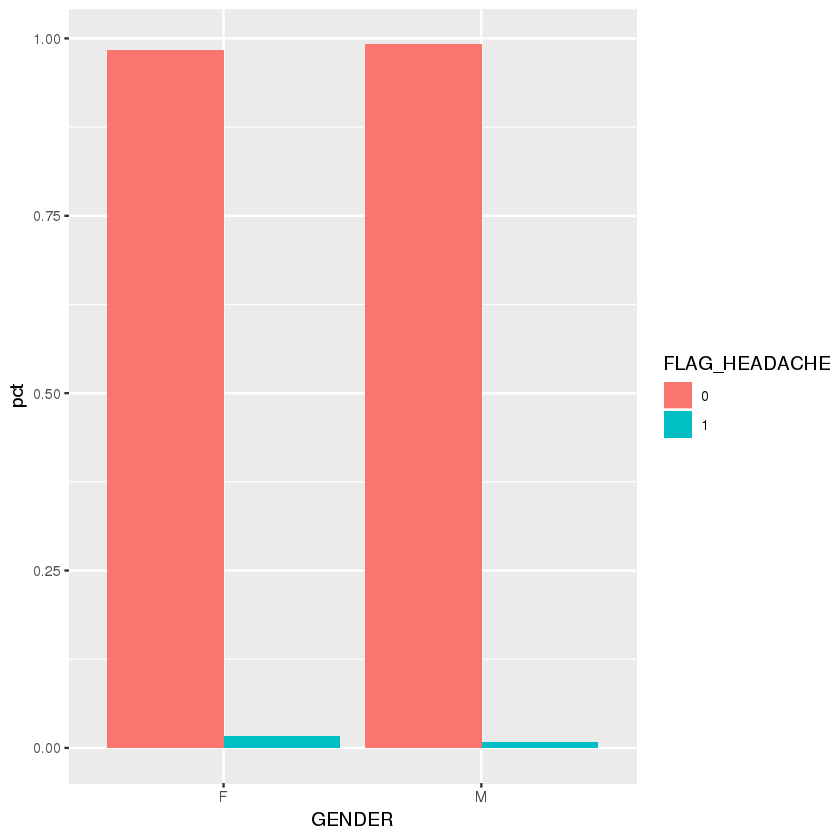

In [24]:
PHESSAgg %>% mutate(FLAG_HEADACHE = as.factor(FLAG_HEADACHE)) %>% ggplot(aes(x = GENDER, y = pct, fill = FLAG_HEADACHE)) + 
geom_bar(stat = "identity", position = "dodge")

# Breaking it down:

A lot happened there - here's the main idea above:

Set up a new data frame using **dplyr** that plugs right into the <font color = "red">ggplot()</font> function, and then utilize the same ideas as before to get the barchart. One extra argument needed to be provided to <font color = "red">geom_bar()</font>, argument **stat** needed to be set to "identity" - this is always the case when we specify the **y** aesthetic ourselves (i.e., not leaving it unspecified or using a keyword like ..count..) and utilize <font color = "red">geom_bar()</font>

# Creating boxplots in **ggplot2**:

We have been creating barcharts using ggplot, but we can also create a boxplot with <font color = "red">geom_boxplot()</font>. Our first example is below. Notice that mapping aesthetics work the same using <font color = "red">geom_boxplot()</font> as with <font color = "red">geom_bar()</font>

Create a boxplot of AGE by diagnosis type (DX_TYPE):

In [3]:
ggplot(aes(x = DX_TYPE, y = AGE), data = PHESS) + geom_boxplot()

ERROR: Error in ggplot(aes(x = DX_TYPE, y = AGE), data = PHESS): could not find function "ggplot"


Create histograms of AGE by diagnosis type - notice we can use the **alpha** argument to specify transparency:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2755 rows containing non-finite values (stat_bin)."

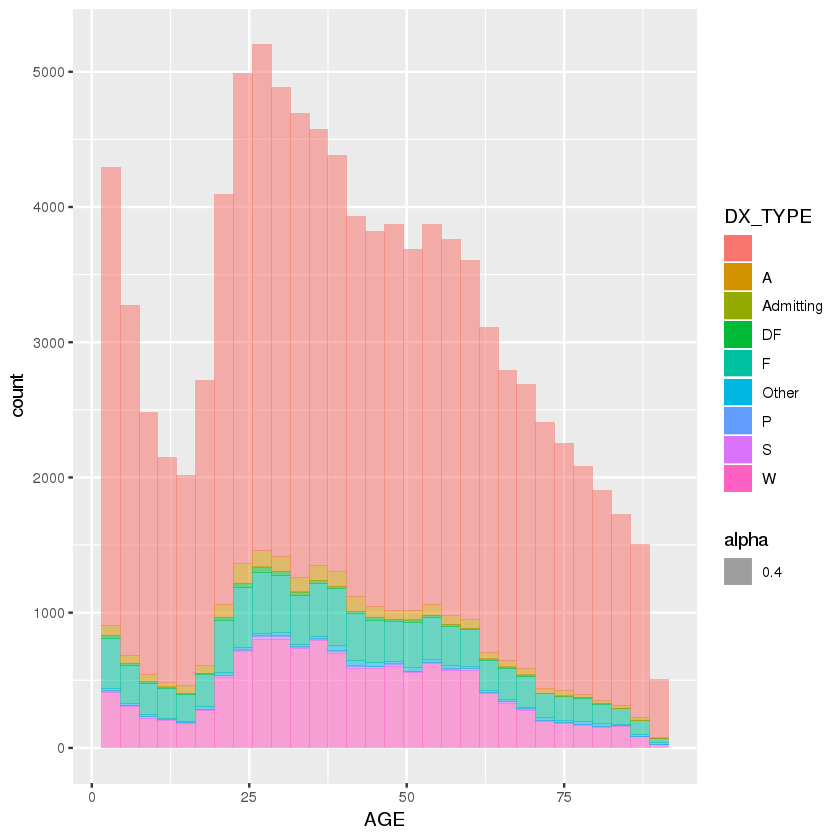

In [11]:
ggplot(aes(x = AGE, fill = DX_TYPE, alpha = 0.4), data = PHESS) + geom_histogram()

# Creating additional flags with R package stringr and visualizing them in ggplot2

Notice that there is no flag for asthma in the above data, suicide, alcohol, or perhaps other indicators. Let's use the **stringr** package, and the <font color = "red">str_detect_all()</font> function to create some new variables:

In [20]:
PHESS1 <- PHESS %>% mutate(FLAG_ASTHMA = ifelse(str_detect(tolower(DX_TEXT), "asthma"), 1, 0),
                           FLAG_SUICIDE = ifelse(str_detect(tolower(DX_TEXT), "suicide|suicidal"), 1, 0),
                           FLAG_ALCOHOL = ifelse(str_detect(tolower(DX_TEXT), "alcohol|beer|alcoholic"), 1, 0))

In [30]:
PHESS1 <- PHESS %>% mutate(FLAG_ABNEKG = ifelse(str_detect(tolower(DX_TEXT), "ecg|ekg|electrocardiogram"), 1, 0))


    0     1 
99929    71 

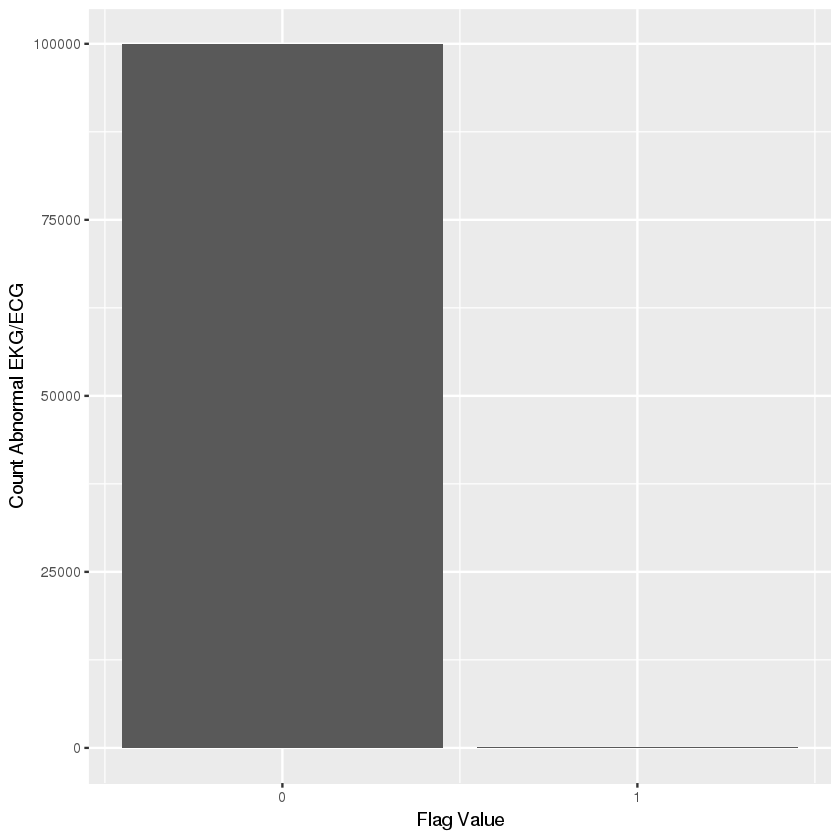

In [31]:
## Create a plot documenting your findings for these (this) new variable(s):
ggplot(aes(x = FLAG_ABNEKG), data = PHESS1) + geom_bar() + ylab("Count Abnormal EKG/ECG") + xlab("Flag Value") +
scale_x_continuous(breaks = c(0,1))